# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Имортировали библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:,.2f}".format)

import sklearn
from numpy.random import RandomState
from sklearn.linear_model import LinearRegression
from scipy import stats as st
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.dummy import DummyRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install nb-black

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# %load_ext lab_black

In [4]:
state = 121

### Считаем датасеты

In [5]:
try:
    train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except FileNotFoundError:
    train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')
    test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')
    full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')

### Посмотрим первые 5 строк и общую информацию

In [6]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,127.09,10.13,7.25,0.99,8.55,10.39,19.53,34.17,14.94,2.53,7.48,2.11,"1,549.78",-498.91,"1,551.43",-516.40,"1,549.87",-498.67,"1,554.37",-493.43,"41,885.71","3,481.78","3,520.34",2.84,6.10,2.28,523.55,55.49,36.81,6.49,11.99,6.01,11.84,6.01,11.50,7.10,28.03,19.79,87.11,5.01,0.51,19.15,1.17,999.71,-404.07,"1,603.01",-434.72,"1,602.38",-442.20,"1,598.94",-451.29,"1,404.47",-455.46,"1,416.35",-451.94,14.50,4.69,8.76,2.61,25.85,-498.53,23.89,-501.41,23.96,-495.26,21.94,-499.34,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,125.63,10.30,7.25,1.00,8.56,10.50,19.37,34.12,16.25,3.05,6.73,2.35,"1,576.17",-500.90,"1,575.95",-499.87,"1,575.99",-499.32,"1,574.48",-498.93,"42,050.86","3,498.37","3,489.98",2.86,6.16,2.27,525.29,57.28,35.75,6.48,11.97,6.01,12.00,6.01,11.62,7.28,28.07,20.05,86.84,4.96,0.54,18.97,1.18,"1,000.29",-400.07,"1,600.75",-449.95,"1,600.48",-449.83,"1,600.53",-449.95,"1,399.23",-450.87,"1,3

In [7]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.80,14.99,8.08,1.01,"1,398.98",-500.23,"1,399.14",-499.92,"1,400.10",-500.70,"1,399.00",-499.49,13.13,5.64,489.79,62.71,42.02,12.08,16.92,6.15,16.87,6.15,"1,001.85",-350.30,"1,249.74",-399.11,"1,249.75",-399.40,"1,198.29",-399.49,999.47,-399.53,949.57,-398.18,24.94,-500.49,14.95,-500.01,20.02,-450.40,13.99,-449.83,12.02,-497.80,8.02,-501.29,7.95,-432.32,4.87,-500.04,26.71,-499.71
1,2016-09-01 01:59:59,215.39,14.99,8.08,0.99,"1,398.78",-500.06,"1,398.06",-499.78,"1,396.15",-499.24,"1,399.51",-500.42,13.04,5.53,490.10,61.96,41.19,11.92,17.00,6.00,17.00,6.00,998.69,-350.43,"1,248.40",-399.95,"1,249.51",-399.63,"1,200.51",-399.94,"1,000.00",-399.49,950.20,-405.79,24.92,-499.81,14.93,-500.76,19.99,-450.11,14.09,-450.06,12.06,-498.70,8.13,-499.63,7.96,-525.84,4.88,-500.16,25.02,-499.82
2,2016-09-01 02:59:59,215.26,12.88,7.79,1.00,"1,398.49",-500.87,"1,398.86",-499.76,"1,398.08",-502.15,"1,399.50",-499.72,13.14,5.43,489.62,66.90,42.55,12.09,16.99,5.85,16.98,5.85,998.52,-349.78,"1,247.44",-400.26,"1,248.21",-401.07,"1,199.77",-400.79,999.93,-399.24,950.32,-400.86,24.91,-500.30,15.00,-500.99,20.04,-450.26,14.08,-449.66,11.96,-498.77,8.10,-500.83,8.07,-500.80,4.91,-499.83,24.99,-500.62
3,2016-09-01 03:59:59,215.34,12.01,7.64,0.86,"1,399.62",-498.86,"1,397.44",-499.21,"1,400.13",-498.36,"1,401.07",-501.04,12.40,5.11,476.62,59.87,41.06,12.18,16.53,5.80,16.52,5.80,"1,000.28",-350.17,"1,251.32",-398.66,"1,250.49",-399.75,"1,199.40",-397.50,"1,001.93",-400.44,950.74,-399.80,24.89,-499.38,14.92,-499.86,20.03,-449.37,14.01,-449.53,12.03,-498.35,8.07,-499.47,7.90,-500.87,4.93,-499.96,24.95,-498.71
4,2016-09-01 04:59:59,199.10,10.68,7.53,0.81,"1,401.27",-500.81,"1,398.13",-499.50,"1,402.17",-500.81,"1,399.48",-499.37,11.33,4.77,488.25,63.32,41.27,11.29,13.61,5.74,13.65,5.74,996.54,-350.56,"1,304.66",-399.51,"1,306.46",-399.05,"1,248.70",-400.88,"1,058.84",-398.99,949.65,-399.28,24.89,-499.36,14.98,-500.19,19.96,-450.64,14.01,-450.02,12.03,-500.79,8.05,-500.40,8.11,-509.53,4.96,-500.36,25.00,-500.86


In [8]:
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,127.09,10.13,7.25,0.99,8.55,10.39,19.53,34.17,14.94,2.53,7.48,2.11,"1,549.78",-498.91,"1,551.43",-516.40,"1,549.87",-498.67,"1,554.37",-493.43,"41,885.71","3,481.78","3,520.34",2.84,6.10,2.28,523.55,55.49,36.81,6.49,11.99,6.01,11.84,6.01,11.50,7.10,28.03,19.79,87.11,5.01,0.51,19.15,1.17,999.71,-404.07,"1,603.01",-434.72,"1,602.38",-442.20,"1,598.94",-451.29,"1,404.47",-455.46,"1,416.35",-451.94,14.50,4.69,8.76,2.61,25.85,-498.53,23.89,-501.41,23.96,-495.26,21.94,-499.34,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,125.63,10.30,7.25,1.00,8.56,10.50,19.37,34.12,16.25,3.05,6.73,2.35,"1,576.17",-500.90,"1,575.95",-499.87,"1,575.99",-499.32,"1,574.48",-498.93,"42,050.86","3,498.37","3,489.98",2.86,6.16,2.27,525.29,57.28,35.75,6.48,11.97,6.01,12.00,6.01,11.62,7.28,28.07,20.05,86.84,4.96,0.54,18.97,1.18,"1,000.29",-400.07,"1,600.75",-449.95,"1,600.48",-449.83,"1,600.53",-449.95,"1,399.23",-450.87,"1,3

In [9]:
full.info(), train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


(None, None, None)

In [10]:
train.shape, test.shape, full.shape

((14149, 87), (5290, 53), (19439, 87))

*Train и test - это за нас разбитый на два датасета full. Мы видим, что в тестовом датасете не хватает столбцов. Природу этого предстоит узнать чуть позже, но пока можно сделать вывод, что скорее всего датасет train придётся приводить к такому же кол-ву столбцов, чтобы обучать модель.*

### Проверим действительно ли столбцы test входят в full

In [11]:
# Посчитаем кол-во невошедших столбцов датафрейма test в фул (дабы исключить вероятность того, что в test присутсвуют 
# новые столбцы, которые отсуствуют в train или full)
missed_in_test = set(full.columns) - set(test.columns)
print(len(missed_in_test))
missed_in_test

34


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Результат показал, что в test отсутствует как раз то кол-во столбцов, сколько необходимо, чтобы получить full. Вывели отсутствующие столбцы на экран, чтобы разобраться в будущем в природе их отсутсвия

### Изменим тип столбца дата

In [12]:
full['date'] = pd.to_datetime(full['date'], format='%Y-%m-%d %H:%M:%S')
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d %H:%M:%S')
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')

### Поработаем с пропусками

In [13]:
train.isna().sum().sort_values(ascending=False).head(15)

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
final.output.concentrate_sol                 211
rougher.input.feed_size                      144
primary_cleaner.input.xanthate               100
rougher.input.feed_pb                        100
final.output.tail_pb                         100
primary_cleaner.output.concentrate_pb         86
rougher.input.feed_sol                        78
primary_cleaner.output.tail_sol               46
rougher.input.floatbank11_sulfate             36
primary_cleaner.input.depressant              32
dtype: int64

In [14]:
full.isna().sum().sort_values(ascending=False).head(15)

secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
final.output.concentrate_sol                 211
rougher.input.feed_size                      145
primary_cleaner.output.concentrate_pb        116
primary_cleaner.input.xanthate               104
final.output.tail_pb                         101
rougher.input.feed_pb                        100
rougher.input.feed_sol                        99
primary_cleaner.output.tail_sol               62
rougher.input.floatbank11_sulfate             44
primary_cleaner.input.depressant              37
dtype: int64

In [15]:
test.isna().sum().sort_values(ascending=False).head(15)

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.xanthate                 4
primary_cleaner.input.sulfate                  4
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_a_air       3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank2_b_level     0
rougher.state.floatbank10_f_level              0
rougher.state.floatbank10_f_air                0
dtype: int64

Так как нам не надо трогать особо датасет full, то обратим внимание только на test и train
Следующий шаг мы сделаем для того, чтобы определить циклом, какие из столбцов имеющие больше 50 пропущенных значений имеют высокую степень корреляции с другими столбцами. Таким образом мы могли бы разделить медианное значение столбца с пропуском на медианное значение найденного столбца с высокой корреляцией, получив своего образа коэффициент

In [16]:
train1 = train.copy()
train1 = train1.drop(['date'], axis=1)

for i in train1.isna().sum().sort_values(ascending=False).head(7).index:
    c = 0
    hight_corr = 0
    for j in train1.columns:
        if train1[i].corr(train1[j]) > 0.6 and i != j and train1[i].corr(train1[j]) > c:
            c = train1[i].corr(train1[j])
            hight_corr = j
    if hight_corr == 0:
        hight_corr, c = 'нет высоких', 'корреляций'
    print(i, 'vs', hight_corr, c)

secondary_cleaner.output.tail_sol vs нет высоких корреляций
rougher.state.floatbank10_e_air vs rougher.state.floatbank10_f_air 0.9406961588673878
rougher.input.floatbank11_xanthate vs rougher.input.floatbank10_xanthate 0.9400485372473936
primary_cleaner.output.concentrate_sol vs primary_cleaner.output.concentrate_ag 0.6887726826775844
secondary_cleaner.state.floatbank2_a_air vs secondary_cleaner.state.floatbank2_b_air 0.882160412052772
final.output.concentrate_sol vs нет высоких корреляций
rougher.input.feed_size vs нет высоких корреляций


Далее пропущенные данные мы будем заполнять полученным коэффициентом умноженным на столбец с высоким уровнем корреляции

In [17]:
def fill_by_another_columns_median(col_with_na, col_filled):
    kf = train[col_with_na].median() / train[col_filled].median() # коэффициент зависимости между медианами столбцов 
    train[col_with_na] = train[col_with_na].fillna(kf * train[col_filled])
    
    return train[col_with_na]

In [18]:
fill_by_another_columns_median('rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_f_air')
fill_by_another_columns_median('rougher.input.floatbank11_xanthate', 'rougher.input.floatbank10_xanthate')
fill_by_another_columns_median('primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_ag')
fill_by_another_columns_median('secondary_cleaner.state.floatbank2_a_air', 'secondary_cleaner.state.floatbank2_b_air');

Оставшиеся пропуски, к которым не удалось подобрать столбец с корреляциями, и столбцы, где кол-во пропусков менее 50 (а данные состоят из последовательных этапов процесса), мы просто используем заполнение следующим/предыдущим значением.

PS была еще мысль воспользоваться методом interpolate(method='time'), но почему-то не сработало

In [19]:
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')

### Проверим корреляцию в датасете train

In [20]:
# создадим счётчик столбцов с высокой корреляцией, а так же выведем на экран все пары, чьи корреляции выше 0.6
corr = train.corr()
corr = corr[(corr > 0.6) & (corr < 0.999999)].unstack().dropna().sort_values(ascending=False)
print(corr)
print(len(corr)/2)

rougher.state.floatbank10_f_level         rougher.state.floatbank10_e_level    0.99
rougher.state.floatbank10_e_level         rougher.state.floatbank10_f_level    0.99
rougher.state.floatbank10_b_level         rougher.state.floatbank10_c_level    0.99
rougher.state.floatbank10_c_level         rougher.state.floatbank10_b_level    0.99
rougher.state.floatbank10_d_level         rougher.state.floatbank10_c_level    0.99
                                                                               ... 
secondary_cleaner.state.floatbank4_a_air  rougher.state.floatbank10_a_level    0.61
rougher.input.feed_au                     primary_cleaner.input.sulfate        0.61
primary_cleaner.input.sulfate             rougher.input.feed_au                0.61
rougher.input.floatbank10_xanthate        rougher.input.feed_rate              0.60
rougher.input.feed_rate                   rougher.input.floatbank10_xanthate   0.60
Length: 150, dtype: float64
75.0


Насчитали 74 высокии корреляции. Здесь надо либо работать со столбцами и избавлять от мультиколлинеарности, либо не использовать линейную регрессию, на которую пагубно влияют такие высокие уровни корреляции. На данный момент из возможных обработок столбцов мы знаем только удаление.

### Проверим правильность расчёта эффективности обогащения

In [21]:
# воспользуемся формулой, чтобы получить новое расчётное значение recovery
recovery_new = train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] - 
    train['rougher.output.tail_au'])/(train['rougher.input.feed_au'] * (train['rougher.output.concentrate_au'] -
                                                                  train['rougher.output.tail_au']))*100


In [22]:
# с помощью mae определим разницу между данными значениями recovery и расчётными по формуле
mean_absolute_error(train['rougher.output.recovery'], recovery_new)

9.73512347450521e-15

Можно сделать вывод, что расчёт эффективности верен

### Проанализируем столбцы, недоступные в тестовой выборке

У нас уже есть список столбцов, которые отсутствуют в test и они находятся [выше](#Проверим-действительно-ли-столбцы-test-входят-в-full), их мы просто сверим с типом столбцов, которые всё же присутсвуют в test.

In [23]:
#test.columns

**Посмотрев на колонки, которые отсутвуют в датасете и сравнив их с имеющимися (закомментировано, потому что занимает много места), можно сделать вывод, что отсуствуют у нас столбцы по типу параметра блока output и calculation, то есть по сути это параметры уже не сырья, выходящей продукции и расчётные значения, что убирать было очень даже логично. Ведь опираясь на них, можно предсказать очень точные результаты, а модель должна определить именно по входящим параметрам**

**Далее нам надо привести к единому кол-ву столбцов так же и train**

In [24]:
for i in missed_in_test:
    train = train.drop(i, axis=1)
train.shape, test.shape

((14149, 53), (5290, 53))

### Добавим в train и test целевые столбцы

In [25]:
test = test.merge(full[['date', 'final.output.recovery', 'rougher.output.recovery']], on='date', how='left')
train = train.merge(full[['date', 'final.output.recovery', 'rougher.output.recovery']], on='date', how='left')

*Минивывод: были считаны и изучены датасеты. У нас их всего 3: один из них большой общий, и два других - для обучения и для теста. Были проработаны пропуски, проанализированы столбцы каждого датасета. Так как для обучения и теста кол-во столбцов не совпадало, то пришлось уравнять их, так же пришлось добавить целевые столбцы, по колонке с датой. Так же провели проверку правильности расчёта эффективного обогащения*

Почему не учтено, когда у меня висит сверху минивывод?(

## Анализ данных

### Построим график концентраций металлов (золота, серебра, свинца) на разных этапах очистки

In [26]:
# Добавим списки названий столбцов металлов (золота, серебра, свинца) на разных этапах очистки
au = [
    'rougher.input.feed_au',
    'rougher.output.concentrate_au',
    'primary_cleaner.output.concentrate_au',
    'final.output.concentrate_au'
]
ag = [
    'rougher.input.feed_ag',
    'rougher.output.concentrate_ag',
     'primary_cleaner.output.concentrate_ag',
    'final.output.concentrate_ag'
]
pb = [
    'rougher.input.feed_pb',
    'rougher.output.concentrate_pb',
    'primary_cleaner.output.concentrate_pb',
    'final.output.concentrate_pb'
]

# Так же добавим списки с названиями этапов
label_name = [
    '1_stage',
    '2_stage',
    '3_stage',
    'final'
]

In [27]:
def concentration(metall, bins, alpha, name):
    for i in metall:
        full[i].hist(bins=bins, alpha=alpha, figsize=(12,6), legend=True, grid=True)
        plt.title(name)
        plt.ylabel('частота встречающихся значений')
        plt.xlabel("Концентрация металлов")

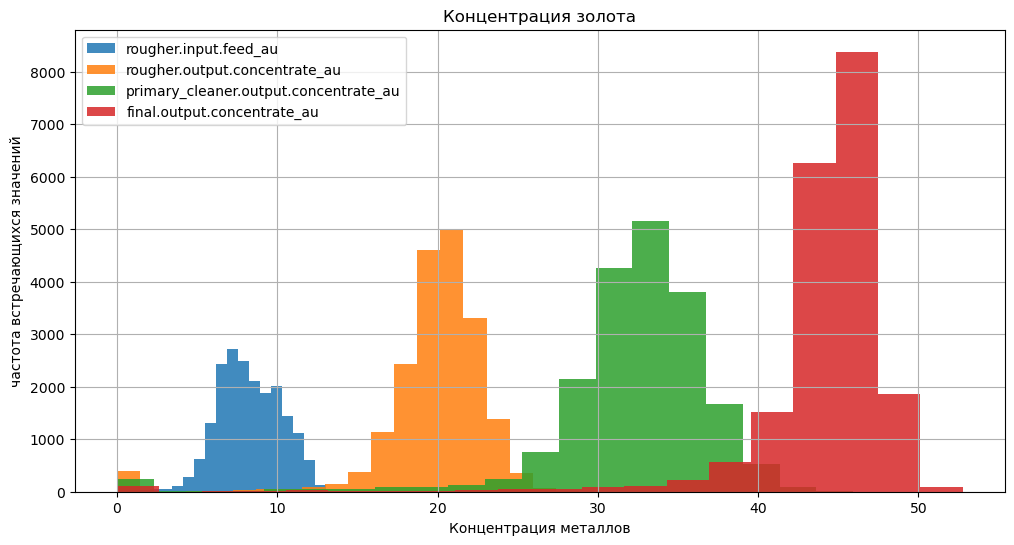

In [28]:
concentration(au, 20, 0.85, 'Концентрация золота')

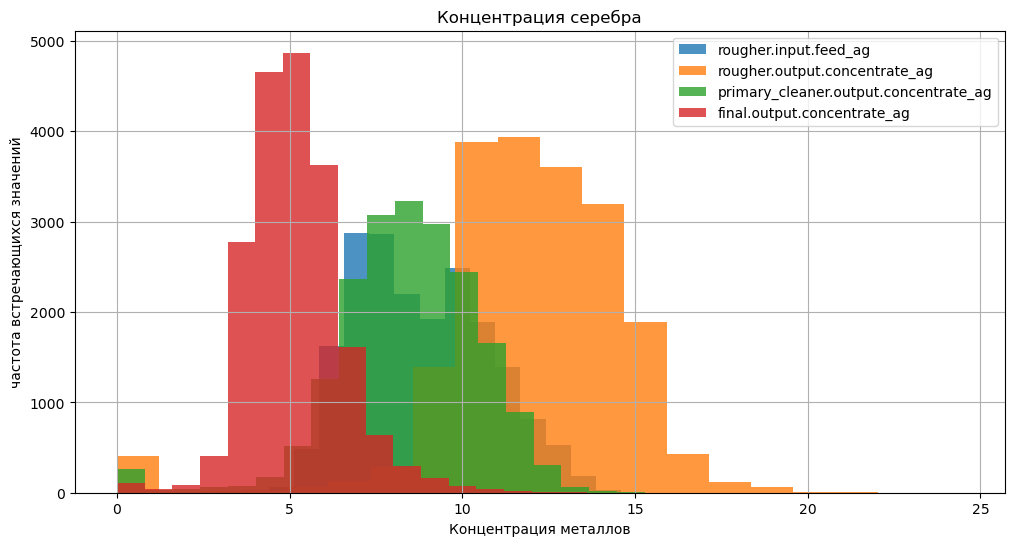

In [29]:
concentration(ag, 20, 0.8, "Концентрация серебра")

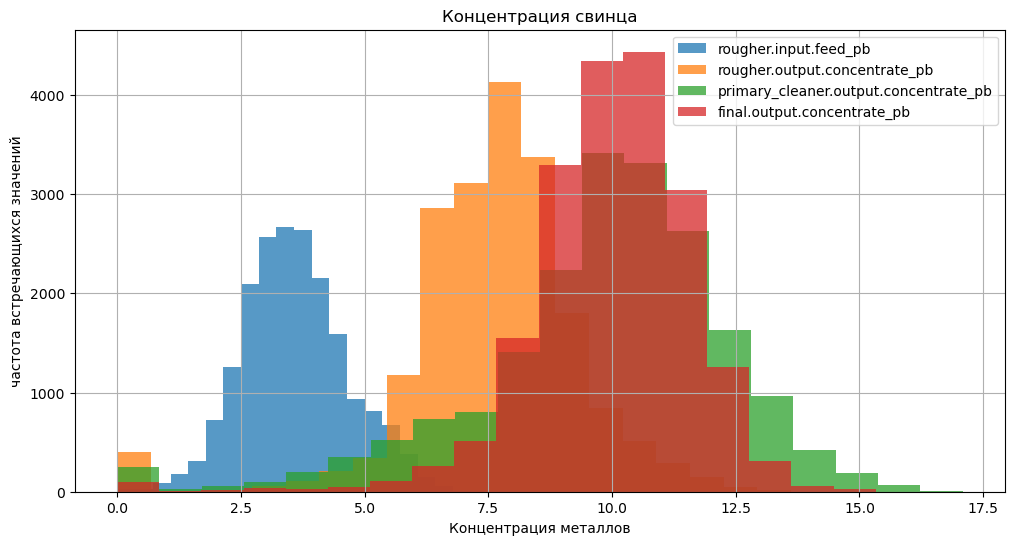

In [30]:
concentration(pb, 20, 0.75, "Концентрация свинца")

По графикам можно сделать выводы, что целевой металл - золото растёт от этапа к этапу, на финальном же этапе концентрация золота в несколько раз превышает концентрацию того же золота на первом этапе. Серебро же на финальном этапе имеет концентрацию меньше, чем на первом этапе, а максимум имеет на втором этапе, после чего наблюдается спад.Так же по гистограммам можно увидеть аномалии нулевого содержаний металлов по каждому из металлов и на каждом этапе очистки. Таких выбросов немного, но всё же они есть.

### Построим и сравним графики распределения размеров гранул сырья в train и test

Для начала найдём эти самые столбцы. Чтобы не искать вручную напишем небольшой цикл, так как из условия мы знаем, что размер гранул сырья должен содержать блок 'feed_size'

In [31]:
feed_size = []
[feed_size.append(col) for col in test.columns if 'feed_size' in col]
print(feed_size)

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']


#### Построим kdeplot

In [32]:
def distr_kde (column, name, n, n_1):
    plt.figure(figsize=(12,6))
    for i in (train, test):
        sns.kdeplot(i[column], gridsize=100)
        plt.title("Распределение размеров гранул сырья в train и test выборках")
        plt.ylabel('частота встречающихся значений')
        plt.xlabel(name)
        plt.xlim(n,n_1)
        plt.grid()
        plt.legend(['train', 'test'])
        

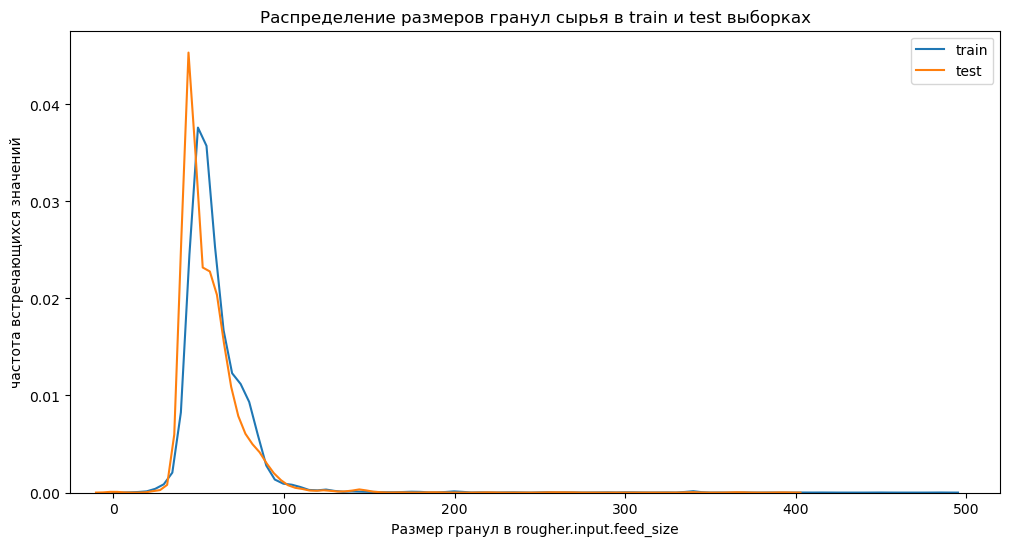

In [33]:
distr_kde(feed_size[1], "Размер гранул в rougher.input.feed_size", None, None)

Укоротим график по оси Х для более детального обзора

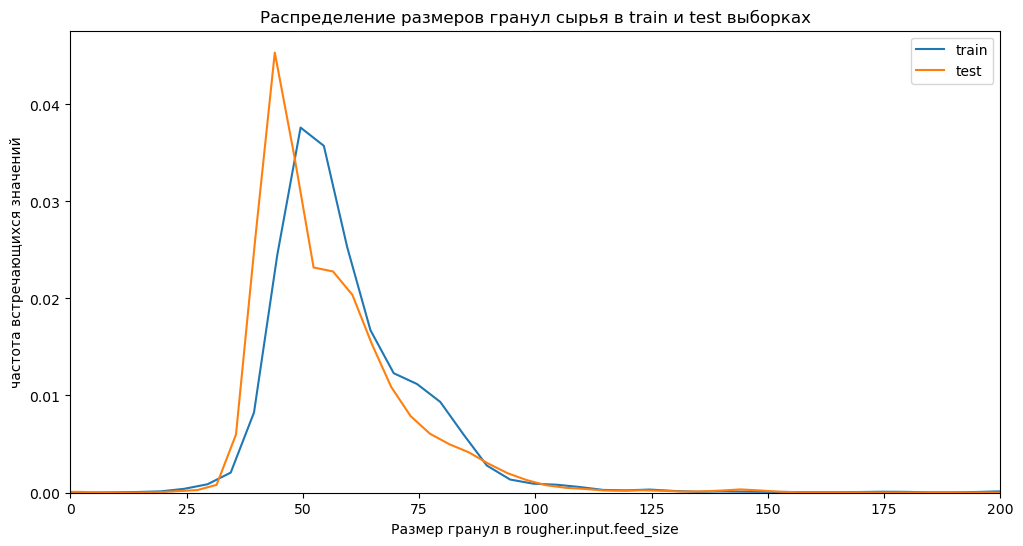

In [34]:
distr_kde(feed_size[1], "Размер гранул в rougher.input.feed_size", 0, 200)

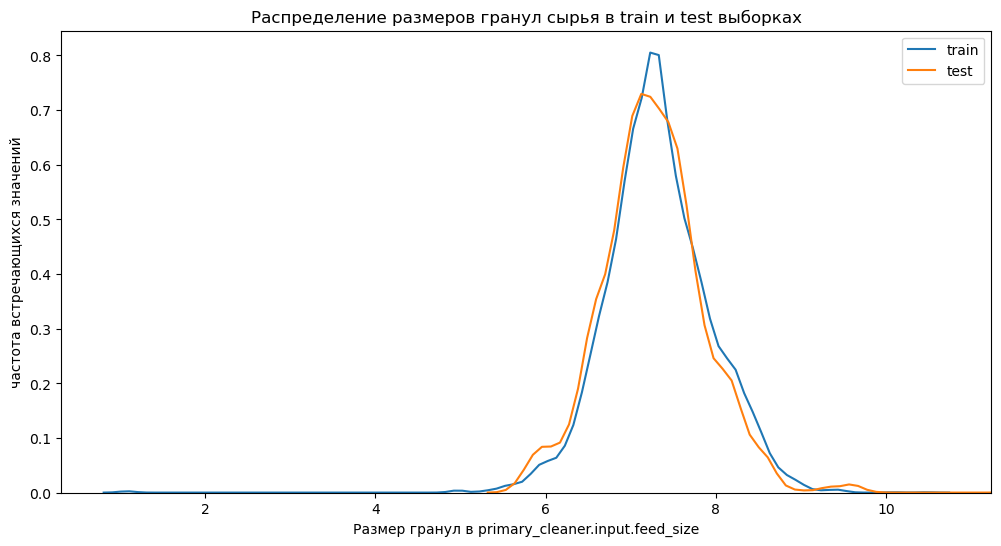

In [35]:
distr_kde(feed_size[0], "Размер гранул в primary_cleaner.input.feed_size", None, None)

*Как можем заметить на наших графиках - распределения показателей между train и test не имеют принципиальных отличий.*

### Построим график суммарной концентрации всех веществ на этапах сырья, черновом и финальном.

In [36]:
# Просуммируем концентрации веществ на разных этапах

def rougher_summ(concentrate_1, concentrate_2, concentrate_3, concentrate_4):
     return pd.Series(full[concentrate_1] + full[concentrate_2] + full[concentrate_3] + full[concentrate_4])

In [37]:
rougher_input = rougher_summ(
        'rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol'
                            )
rougher_output = rougher_summ(
                'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 
                'rougher.output.concentrate_pb','rougher.output.concentrate_sol'
                            )
final = rougher_summ(
    'final.output.concentrate_au', 'final.output.concentrate_ag', 
    'final.output.concentrate_pb', 'final.output.concentrate_sol'
                    )

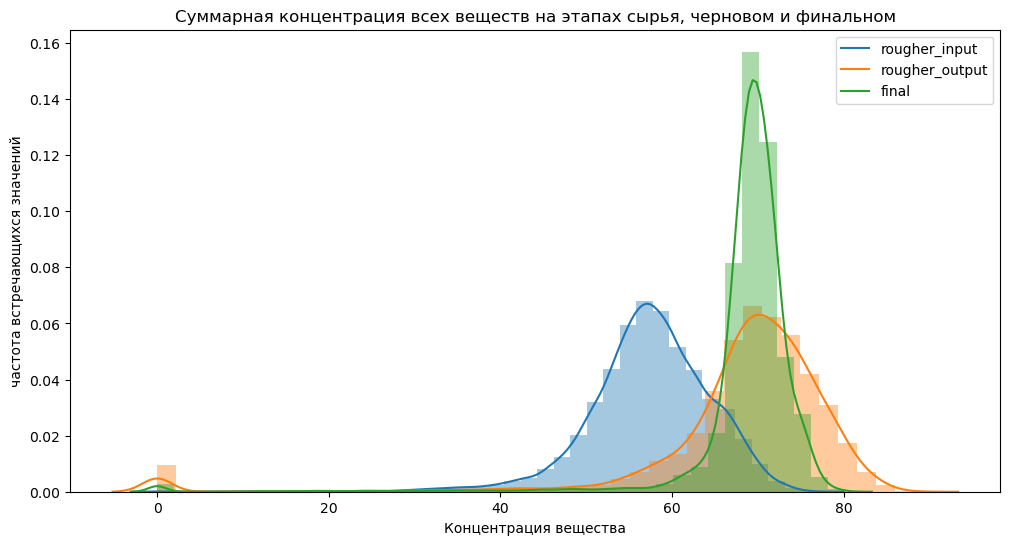

In [38]:
plt.figure(figsize=(12,6))
for i in (rougher_input, rougher_output, final):
    sns.distplot(i, hist=True, kde=True, rug=False, bins=40);
    plt.title("Суммарная концентрация всех веществ на этапах сырья, черновом и финальном")
    plt.ylabel('частота встречающихся значений')
    plt.xlabel("Концентрация вещества")
    plt.legend(['rougher_input', 'rougher_output', 'final'])

In [39]:
rougher_input.describe()

count   19,245.00
mean        57.41
std          7.17
min          0.04
25%         53.66
50%         57.65
75%         62.01
max         76.98
dtype: float64

In [40]:
rougher_output.describe()

count   19,416.00
mean        68.19
std         12.48
min          0.00
25%         66.03
50%         70.19
75%         74.36
max         88.14
dtype: float64

In [41]:
final.describe()

count   19,227.00
mean        68.73
std          7.42
min          0.00
25%         67.99
50%         69.63
75%         71.39
max         80.21
dtype: float64

### Удалим нулевые выбросы

In [42]:
# создадим переменную, содержащую столбцы, которые надо очистить от нулевых значений
check_zero = (
    'rougher.input.feed_au',
    'rougher.output.concentrate_au',
    'primary_cleaner.output.concentrate_au',
    'final.output.concentrate_au',
    'rougher.input.feed_ag',
    'rougher.output.concentrate_ag',
     'primary_cleaner.output.concentrate_ag',
    'final.output.concentrate_ag',
    'rougher.input.feed_pb',
    'rougher.output.concentrate_pb',
    'primary_cleaner.output.concentrate_pb',
    'final.output.concentrate_pb',
    )


In [43]:
# в full конечно можно было не удалять столбцы, но на всякий случай убрали и из него
for df in (train, test, full):
    for column in (check_zero):
        if column not in df.columns:
            continue
        df[column] = df[column].dropna(how='any', axis=0)

In [44]:
# Проверили кол-во нулей после обработки
train.columns.isnull().sum()

0

*Как можно увидеть из дискрайба - средние значения финального и чернового этапов примерно равны, а вот этап сырья чуть-чуть меньше. График показывает это более точно и там можно увидеть, что разница концентрации веществ на этапе сырья чуть меньше двух других этапов. Так же можно заметить в графиках и дискрайбе аномальные данные с нулевой концентрацией металлов. Это можно считать выбросом и впоследствии удалить из выборок train и test*

*Минивывод: поработали с графиками и оценили концентрации металлов на разных этапах очистки и суммарные концентрации металлов. Графики так же показали и нулевые содержания металлов на некоторых этапах. От этих значений было решено избавиться как от невозможных выбросов*

## Модель

### Напишем функцию для поиска итогового sMAPE

In [45]:
def get_smape(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

In [46]:
def get_final_smape(rougher, final):
    final = 0.25*rougher+0.75*final
    return final

In [47]:
# Создадим пустой список для сохранения результатов smap по разным моделям
final_smap = []

### Подоготовим датасеты для обучения

In [48]:
# разобьём train на обучающую и целевую выборки
features_train = train.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)
target_train_final = train['final.output.recovery']
target_train_rougher = train['rougher.output.recovery']

# разобьём test на обучающую и целевую выборки
features_test = test.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)
target_test_final = test['final.output.recovery']
target_test_rougher = test['rougher.output.recovery']

### Воспользуемся деревом решений

#### Определим score_smape

In [49]:
score_smape = make_scorer(get_smape, greater_is_better=False)

#### Подберем гиперпараметры для наших моделей

In [50]:
param_grid_tree = {
    'max_depth': range(1,15)
}
param_grid_forest = {
    'n_estimators':range(100, 401, 50), 
    'max_depth':range(1, 15, 3)
}

#### Напишем функцию для get_smape через GridSearchCV

In [51]:
def model_fit_grid(model_grid, model_param_grid, features, target):
    model = GridSearchCV(
        model_grid,
        param_grid = model_param_grid,
        verbose=2,
        cv=3,
        n_jobs=-1, 
        scoring = score_smape
        )
    model.fit(features, target)

    return model

*предикты будем выводить, чтобы в случае лучшей модели, можно было пользоваться предсказанием на тесте*

### Воспользуемся деревом решений

#### Найдём итоговый get_smape

In [52]:
tree_model_rougher = model_fit_grid(
    DecisionTreeRegressor(random_state=state), param_grid_tree, 
    features_train, target_train_rougher
                        )
tree_model_final = model_fit_grid(
    DecisionTreeRegressor(random_state=state), param_grid_tree, 
    features_train, target_train_final
                        )

smape_tree = get_final_smape(
    -1 * tree_model_rougher.best_score_,
    -1 * tree_model_final.best_score_
    )
final_smap.append(smape_tree)

print('Итоговый sMAPE по решающему древу:', round(smape_tree, 2))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Итоговый sMAPE по решающему древу: 11.18


### Опробуем линейную регрессию

#### Напишем функцию для get_smape через cross_val_score

In [53]:
def Linear(features, target, state=state):
    smape = cross_val_score(
        LinearRegression(),
        features, target, 
        cv=3,
        scoring=score_smape, 
        n_jobs = -1, verbose = 10
    )
    
    smape = smape.mean()
    
    return (-smape)

#### Найдём итоговый get_smape для регрессии

In [54]:
smape_linear = get_final_smape(
    Linear(features_train, target_train_rougher),
    Linear(features_train, target_train_final)
    )

final_smap.append(smape_linear)

print('Итоговый sMAPE по линейной регресиии:', round(smape_linear, 2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0550s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.


Итоговый sMAPE по линейной регресиии: 15.7


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0530s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


### Воспользуемся случайным лесом

#### Найдём итоговый get_smape для леса

In [56]:
forest_model_rougher = model_fit_grid(
    RandomForestRegressor(random_state=state), param_grid_forest, 
    features_train, target_train_rougher
)
forest_model_final = model_fit_grid(
    RandomForestRegressor(random_state=state), param_grid_forest, 
    features_train, target_train_final
)

smape_forest = get_final_smape(
    -1 * forest_model_rougher.best_score_,
    -1 * forest_model_final.best_score_
    )

final_smap.append(smape_forest)

print('Итоговый sMAPE по случайному лесу:', round(smape_forest, 2))

Fitting 3 folds for each of 35 candidates, totalling 105 fits
Fitting 3 folds for each of 35 candidates, totalling 105 fits
Итоговый sMAPE по случайному лесу: 11.49


### Отобразим на графике результаты всех моделей и выберем наименьшую из них

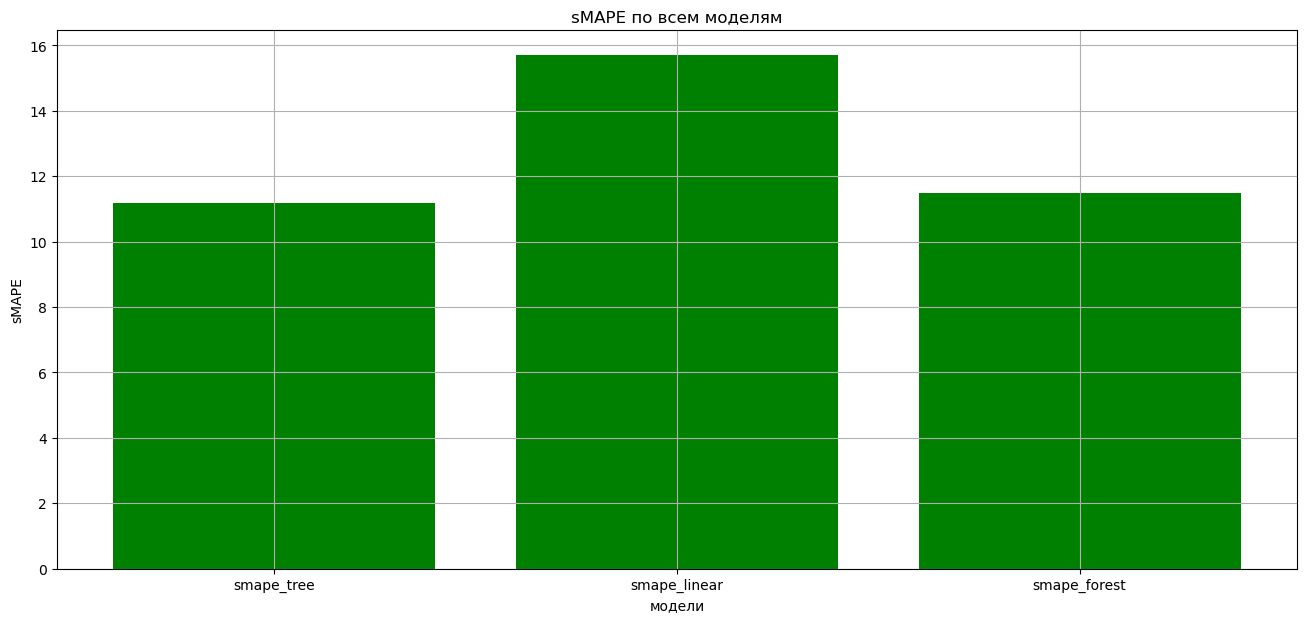

In [57]:
plt.figure(figsize=(16, 7))
plt.bar(['smape_tree', 'smape_linear', 'smape_forest'], final_smap, color = 'green')
plt.title('sMAPE по всем моделям')
plt.xlabel('модели')
plt.ylabel('sMAPE')
plt.grid()
plt.show()

Отсюда мы можем видеть, что лучшей моделью является случайный лес, так как его значение является наименьшим

### Итоговая модель на тесте

In [58]:
predict_roug_forest = forest_model_rougher.predict(features_test)
predict_final_forest = forest_model_final.predict(features_test)

final_smape = get_final_smape(  
    get_smape(predict_roug_forest, target_test_rougher),
    get_smape(predict_final_forest, target_test_final)
    )

print('Итоговая get_final_smape на тестовой выборке по лучшей модели:', round(final_smape, 2))

Итоговая get_final_smape на тестовой выборке по лучшей модели: 9.68


### Проверим модель на адекватность

In [59]:
def dummy(strategy, train, target, features_test, target_test):
    dummy_regr = DummyRegressor(strategy=strategy)
    dummy_regr.fit(train, target)
    dummy_regr.predict(features_test)
    
    return get_smape(dummy_regr.predict(features_test), target_test)

In [60]:
get_final_smape(
    dummy('mean', features_train, target_train_rougher, features_test, target_test_rougher),
    dummy('mean', features_train, target_train_final, features_test, target_test_final)
    )

10.289630376021035

Можем сделать вывод, что наша модель адекватна, хотя дамми даёт не слишком отстаёт.

## Вывод

**Мы скачали и изучили датасеты. Убедились, что train и test - это за нас разбитый на два датасета full. На всякий случай проверили, действительно ли столбцы test входят в full. Результат показал, что в test отсутствует как раз то кол-во столбцов, сколько необходимо, чтобы получить full. Вывели отсутствующие столбцы на экран, чтобы разобраться в будущем в природе их отсутсвия. Изменили тип столбца с датой в каждом датафрейме. Попытались проработать все пропуски в трэйн и тест через коэффициенты корреляционных столбцов, там где  не удалось подобрать столбец с корреляциями, и столбцы, где кол-во пропусков менее 50 (а данные состоят из последовательных этапов процесса), мы просто используем заполнение следующим/предыдущим значением. Несмотря на то, что у нас много столбцов с корреляциями, мы не стали их трогать.
Проверили, что эффективность обогащения рассчитана правильно. Вычислили её на обучающей выборке для признака rougher.output.recovery. Нашли MAE между нашими расчётами и значением признака. MAE оказалось очень мало, что можно сказать, что эффективность обогащения рассчитана правильно.**
**Посмотрев на колонки, которые отсутвуют в датасете и сравнив их с имеющимися, можно сделать вывод, что отсуствуют у нас столбцы по типу параметра блока output и calculation, то есть по сути это параметры уже не сырья, выходящей продукции и расчётные значения, что убирать было очень даже логично. Ведь опираясь на них, можно предсказать очень точные результаты, а модель должна определить именно по входящим параметрам. Далее нам надо привести к единому кол-ву столбцов так же и train (удалить лишние). Далее добавили в тестовый датафрейм целевые столбцы и перешли к анализу данных.** 

**Первым делом нам надо было определить концентрацию металлов (золота, серебра, свинца) на разных этапах очистки. С этим делом неплохо справилась гистограмма, так что мы написали функцию и вывели график на экран. По графикам можно сделать выводы, что целевой металл - золото растёт от этапа к этапу, на финальном же этапе концентрация золота в 4 раза превышает концентрацию того же золота на первом этапе. Серебро же на финальном этапе имеет концентрацию меньше, чем на первом этапе, а максимум имеет на втором этапе, после чего наблюдается спад. Концентрация свинца в свою очередь растёт до третьего этапа (вторая очистка), после чего до финального этапа наблюдается стагнация концентрации. Второй график показал нам наличие выбросов в виде нулевых значений. Нулевых значений быть не может в данном случае. Было решено удалить.**

**Далее от нас требовалось сравнить распределения размеров гранул сырья в train и test. Для этого мы воспользовались гистограммой и кде-плотом. Как можем заметить на наших графиках - распределения показателей между train и test не имеют принципиальных отличий.**

**Перейдя к моделям мы в первую очередь написали функцию для вычисления sMAPE и итоговой sMAPE. Затем мы разделили датасеты на обучающую и две тестовые (для чернового концентрата и для финального продукта). Далее мы к каждой из моделей (кроме регрессии) применили GridSearchCV для поиска лучших гиперпараметров. К регрессии мы применили кросвалидацию. После обучения моделей на этих гиперпараметрах мы применили функцию и высчитали sMAPE. Лучшим оказался случайный лес, и затем мы проверили адекватность нашей модели на дамми-регрессор. Наша модель адекватна.**